# Homework 6
## Due:  Tuesday, October 10 at 11:59 PM

# Problem 1: Bank Account Revisited

We are going to rewrite the bank account closure problem we had a few assignments ago, only this time developing a formal class for a Bank User and Bank Account to use in our closure (recall previously we just had a nonlocal variable amount that we changed). 

### Some Preliminaries:
First we are going to define two types of bank accounts.  Use the code below to do this:

In [2]:
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2

An Enum stands for an enumeration, it's a convenient way for you to define lists of things. Typing:

In [3]:
AccountType.SAVINGS

<AccountType.SAVINGS: 1>

returns a Python representation of an enumeration. You can compare these account types:

In [4]:
AccountType.SAVINGS == AccountType.SAVINGS

True

In [5]:
AccountType.SAVINGS == AccountType.CHECKING

False

To get a string representation of an Enum, you can use:

In [6]:
AccountType.SAVINGS.name

'SAVINGS'

### Part 1: Create a BankAccount class with the following specification:

Constructor is `BankAccount(self, owner, accountType)` where `owner` is a string representing the name of the account owner and `accountType` is one of the AccountType enums

Methods `withdraw(self, amount)` and `deposit(self, amount)` to modify the account balance of the account

Override methods `__str__` to write an informative string of the account owner and the type of account, and `__len__` to return the balance of the account

In [7]:
class BankAccount():
    def __init__(self,owner,accountType):
        self.owner=owner
        self.accountType=accountType
        self.balance=0
    def withdraw(self,amount):
        if amount<0:
            raise ValueError("amount<0")
        if self.balance<amount:
            raise ValueError("withdraw more than balance")
        self.balance-=amount
    def deposit(self,amount):
        if amount<0:
            raise ValueError("amount<0")
        self.balance+=amount
    def __str__(self):
        return "owner:{!s} account type:{!s}".format(self.owner,self.accountType.name)
    def __len__(self):
        return self.balance

In [8]:
myaccount=BankAccount("zhaizhai",AccountType.CHECKING)

In [9]:

print(myaccount.balance)


0


### Part 2:  Write a class BankUser with the following specification:

Constructor `BankUser(self, owner)` where `owner` is the name of the account.

Method `addAccount(self, accountType)` - to start, a user will have no accounts when the BankUser object is created. `addAccount` will add a new account to the user of the `accountType` specified. **Only one savings/checking account per user, return appropriate error otherwise**

Methods `getBalance(self, accountType)`, `deposit(self, accountType, amount)`, and `withdraw(self, accountType, amount)` for a specific AccountType.

Override `__str__` to have an informative summary of user's accounts.

In [10]:
class BankUser():
    def __init__(self,owner):
        self.owner=owner
        self.SavingAccount=None
        self.CheckingAccount=None
    def addAccount(self,accountType):
        if accountType==AccountType.SAVINGS:
            if self.SavingAccount==None:
                self.SavingAccount=BankAccount(self.owner,accountType)
            else:
                print("more than one saving account!")
                raise AttributeError("more than one saving account!")
        elif accountType==AccountType.CHECKING:
            if self.CheckingAccount==None:
                self.CheckingAccount=BankAccount(self.owner,accountType)
            else:
                print("more than one checking account!")
                raise AttributeError("more than one checking account!")
        else:
            print("no such account type!")
            raise ValueError("no such account type!")
    def getBalance(self,accountType):
        if accountType==AccountType.SAVINGS:
            if self.SavingAccount==None:
                print("saving account not exist")
                raise AttributeError("saving account not exist")
            else:
                return self.SavingAccount.balance
        elif accountType==AccountType.CHECKING:
            if self.CheckingAccount==None:
                print("checking account not exist")
                raise AttributeError("checking account not exist")
            else:
                return self.CheckingAccount.balance
        else:
            print("no such account type!")
            raise AttributeError("no such account type!")
    
    def deposit(self,accountType,amount):
        if accountType==AccountType.SAVINGS:
            if self.SavingAccount==None:
                print("saving account not exist")
                raise AttributeError("saving account not exist")
            else:
                return self.SavingAccount.deposit(amount)
        elif accountType==AccountType.CHECKING:
            if self.CheckingAccount==None:
                print("checking account not exist")
                raise AttributeError("checking account not exist")
            else:
                return self.CheckingAccount.deposit(amount)
        else:
            print("no such account type!")
            raise AttributeError("no such account type!")

            
    def withdraw(self,accountType,amount):
        if accountType==AccountType.SAVINGS:
            if self.SavingAccount==None:
                print("saving account not exist")
                raise AttributeError("saving account not exist")
            else:
                return self.SavingAccount.withdraw(amount)
        elif accountType==AccountType.CHECKING:
            if self.CheckingAccount==None:
                print("checking account not exist")
                raise AttributeError("checking account not exist")
            else:
                return self.CheckingAccount.withdraw(amount)
        else:
            print("no such account type!")
            raise AttributeError("no such account type!")
     
    def __str__(self):
        s="owner:{!s}".format(self.owner)
        if self.SavingAccount!=None:
            s=s+"account type: Saving balance:{:.2f}".format(self.SavingAccount.balance)
        if self.CheckingAccount!=None:
            s=s+"account type: Checking balance:{:.2f}".format(self.CheckingAccount.balance)
        return s
        

In [11]:
newuser=BankUser("zhaizhai")
print(newuser)
newuser.addAccount(AccountType.SAVINGS)
print(newuser)
newuser.deposit(AccountType.SAVINGS,2)
newuser.withdraw(AccountType.SAVINGS,1)
print(newuser)
newuser.withdraw(AccountType.CHECKING,1)

owner:zhaizhai
owner:zhaizhaiaccount type: Saving balance:0.00
owner:zhaizhaiaccount type: Saving balance:1.00
checking account not exist


AttributeError: checking account not exist

Write some simple tests to make sure this is working. Think of edge scenarios a user might try to do.

### Part 3:  ATM Closure

Finally, we are going to rewrite a closure to use our bank account. We will make use of the [input function](http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/io.html) which takes user input to decide what actions to take.

Write a closure called ATMSession(bankUser) which takes in a BankUser object. Return a method called Interface that when called, would provide the following interface:

First screen for user will look like:


**Enter Option:**

**1)Exit**

**2)Create Account**

**3)Check Balance**

**4)Deposit**

**5)Withdraw**


Pressing 1 will exit, any other option will show the options:



**Enter Option:**

**1)Checking**

**2)Savings**


If a deposit or withdraw was chosen, then there must be a third screen:



**Enter Integer Amount, Cannot Be Negative:**

This is to keep the code relatively simple, if you'd like you can also curate the options depending on the BankUser object (for example, if user has no accounts then only show the Create Account option), but this is up to you. In any case, you must handle any input from the user in a reasonable way that an actual bank would be okay with, and give the user a proper response to the action specified.

Upon finishing a transaction or viewing balance, it should go back to the original screen

In [59]:
def ATMSession(bankUser):
    def Interface():
        option1=input("Enter Options:\
                        1)Exit\
                        2)Creat Account\
                        3)Check Balance\
                        4)Deposit\
                        5)Withdraw")
        if option1=="1":
            return
        option2=input("Enter Options:\
                        1)Checking\
                        2)Saving")
        if option1=="2":
            if option2=="1":
                bankUser.addAccount(AccountType.CHECKING)
                return
            elif option2=="2":
                bankUser.addAccount(AccountType.SAVINGS)
                return
            else:
                print("no such account type")
                raise AttributeError("no such account type")
        if option1=="3":
            if option2=="1":
                print(bankUser.getBalance(AccountType.CHECKING))
                return
            elif option2=="2":
                print(bankUser.getBalance(AccountType.SAVINGS))
                return
            else:
                print("no such account type")
                raise AttributeError("no such account type")
                
        if option1=="4":
            option3=input("Enter Interger Amount, Cannot be Negative:")
            if option2=="1":
                bankUser.deposit(AccountType.CHECKING,int(option3))
                return
            elif option2=="2":
                bankUser.deposit(AccountType.SAVINGS,int(option3))
                return
            else:
                print("no such account type")
                raise AttributeError("no such account type")
        
        if option1=="5":
            option3=input("Enter Interger Amount, Cannot be Negative:")
            if option2=="1":
                bankUser.withdraw(AccountType.CHECKING,int(option3))
                return
            elif option2=="2":
                bankUser.withdraw(AccountType.SAVINGS,int(option3))
                return
            else:
                print("no such account type")
                raise AttributeError("no such account type")
        print("no such operation")
        raise AttributeError("no such operation")
        Interface()
    return Interface

In [171]:
myATM=ATMSession(newuser)
myATM()

Enter Options:                        1)Exit                        2)Creat Account                        3)Check Balance                        4)Deposit                        5)Withdraw1


In [14]:
print(newuser)

owner:zhaizhaiaccount type: Saving balance:1.00


### Part 4:  Put everything in a module Bank.py

We will be grading this problem with a test suite. Put the enum, classes, and closure in a single file named Bank.py. It is very important that the class and method specifications we provided are used (with the same capitalization), otherwise you will receive no credit.

In [169]:
%%file bank.py
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2
    
class BankAccount():
    def __init__(self,owner,accountType):
        self.owner=owner
        self.accountType=accountType
        self.balance=0
    def withdraw(self,amount):
        if type(amount)!=int:
            raise ValueError("not integer amount")
        if amount<0:
            raise ValueError("amount<0")
        if self.balance<amount:
            raise ValueError("withdraw more than balance")
        self.balance-=amount
    def deposit(self,amount):
        if type(amount)!=int:
            raise ValueError("not integer amount")
        if amount<0:
            raise ValueError("amount<0")
        self.balance+=amount
    def __str__(self):
        return "owner:{!s} account type:{!s}".format(self.owner,self.accountType.name)
    def __len__(self):
        return self.balance
    
    
def ATMSession(bankUser):
    def Interface():
        option1=input("Enter Options:\
                        1)Exit\
                        2)Creat Account\
                        3)Check Balance\
                        4)Deposit\
                        5)Withdraw")
        if option1=="1":
            return
        option2=input("Enter Options:\
                        1)Checking\
                        2)Saving")
        if option1=="2":
            if option2=="1":
                bankUser.addAccount(AccountType.CHECKING)
                return
            elif option2=="2":
                bankUser.addAccount(AccountType.SAVINGS)
                return
            else:
                print("no such account type")
                raise AttributeError("no such account type")
        if option1=="3":
            if option2=="1":
                print(bankUser.getBalance(AccountType.CHECKING))
                return
            elif option2=="2":
                print(bankUser.getBalance(AccountType.SAVINGS))
                return
            else:
                print("no such account type")
                raise AttributeError("no such account type")
                
        if option1=="4":
            option3=input("Enter Interger Amount, Cannot be Negative:")
            if option2=="1":
                bankUser.deposit(AccountType.CHECKING,int(option3))
                return
            elif option2=="2":
                bankUser.deposit(AccountType.SAVINGS,int(option3))
                return
            else:
                print("no such account type")
                raise AttributeError("no such account type")
        
        if option1=="5":
            option3=input("Enter Interger Amount, Cannot be Negative:")
            if option2=="1":
                bankUser.withdraw(AccountType.CHECKING,int(option3))
                return
            elif option2=="2":
                bankUser.withdraw(AccountType.SAVINGS,int(option3))
                return
            else:
                print("no such account type")
                raise AttributeError("no such account type")
        print("no such operation")
        raise AttributeError("no such operation")
    return Interface

Overwriting bank.py


---

## Problem 2:  Linear Regression Class

Let's say you want to create Python classes for three related types of linear regression: Ordinary Least Squares Linear Regression, Ridge Regression, and Lasso Regression. 

Consider the multivariate linear model:

$$y = X\beta + \epsilon$$

where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix, and $\beta$
is a $p$ length vector of coefficients.

#### Ordinary Least Squares Linear Regression

[OLS Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) seeks to minimize the following cost function:

$$\|y - \beta\mathbf {X}\|^{2}$$

The best fit coefficients can be obtained by:

$$\hat{\beta} = (X^T X)^{-1}X^Ty$$

where $X^T$ is the transpose of the matrix $X$ and $X^{-1}$ is the inverse of the matrix $X$.

#### Ridge Regression

[Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) introduces an L2 regularization term to the cost function:

$$\|y - \beta\mathbf {X}\|^{2}+\|\Gamma \mathbf {x} \|^{2}$$

Where $\Gamma = \alpha I$ for some constant $\alpha$ and the identity matrix $I$.

The best fit coefficients can be obtained by:
$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty$$

#### Lasso Regression

[Lasso Regression](https://en.wikipedia.org/wiki/Lasso_%28statistics%29) introduces an L1 regularization term and restricts the total number of predictor variables in the model.
The following cost function:
$${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{m}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq \alpha.}$$

does not have a nice closed form solution. For the sake of this exercise, you may use the [sklearn.linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class, which uses a coordinate descent algorithm to find the best fit. You should only use the class in the fit() method of this exercise (ie. do not re-use the sklearn for other methods in your class).

#### $R^2$ score

The $R^2$ score is defined as:
$${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$

where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.

### Part 1:  Base Class
Write a class called `Regression` with the following methods:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary.

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.

This parent class should throw a `NotImplementedError` for methods that are intended to be implemented by subclasses.

In [133]:
class Regression():
    def __init__(self,X,y):
        self.X=X
        self.y=y
        self.alpha=0.1
    def fit(self,X,y):
        return
    def get_params(self):
        return self.beta
    def predict(self,X):
        import numpy as np
        return np.dot(X,self.beta) 
    def score(self,X,y):
        return 1-np.sum((y-self.predict(X))**2)/np.sum((y-np.mean(y))**2)
    def set_params(self,alpha):
        self.alpha=alpha

### Part 2: OLS Linear Regression

Write a class called `OLSRegression` that implements the OLS Regression model described above and inherits the `Regression` class.

In [134]:
class OLSRegression(Regression):
    def fit(self):
        import numpy as np
        X=self.X
        y=self.y
        self.beta=np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)),np.transpose(X)),y)


In [135]:
ols1=OLSRegression([[2],[3]],[[1],[2]])
ols1.fit()
ols1.predict([[2],[3]])


array([[ 1.23076923],
       [ 1.84615385]])

In [136]:
X=[[2],[3]]
y=[[1],[2]]
beta=np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)),np.transpose(X)),y)



### Part 3: Ridge Regression

Write a class called `RidgeRegression` that implements Ridge Regression and inherits the `OLSRegression` class.

In [137]:
class RidgeRegression(Regression):
    def fit(self):
        import numpy as np
        X=self.X
        y=self.y
        self.beta=np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)+self.alpha**2),np.transpose(X)),y)
        return

In [167]:
ridge1=RidgeRegression([[2],[3]],[[1],[2]])
ridge1.fit()
ridge1.predict([[2],[3]])

array([[ 1.22982321],
       [ 1.84473482]])

In [168]:
ridge1.score([[2],[3]],[[1],[2]])


0.84614802898024988

### Part 3: Lasso Regression

Write a class called `LassoRegression` that implements Lasso Regression and inherits the `OLSRegression` class. You should only use Lasso(), Lasso.fit(), Lasso.coef_, and Lasso._intercept from the `sklearn.linear_model.Lasso` class.

In [140]:
class LassoRegression(Regression):
    def fit(self):
        from sklearn.linear_model import Lasso
        myLs=Lasso(self.alpha,fit_intercept=False)
        myLs.fit(self.X,self.y) 
        self.beta=myLs.coef_.reshape((-1,1))
        self.beta0=myLs.intercept_  
        return
    def predict(self,X):
        import numpy as np
        return np.dot(X,self.beta)+self.beta0

In [165]:
lasso1=LassoRegression([[2],[3]],[[1],[2]])
lasso1.fit()
lasso1.predict([[2],[3]])

array([[ 1.2],
       [ 1.8]])

In [166]:
lasso1.score([[2],[3]],[[1],[2]])

0.83999999999999986

In [143]:
from sklearn.linear_model import Lasso
myLs=Lasso(alpha=0.1)
myLs.fit([[2],[3]],[[1],[1]])
beta=np.array(myLs.coef_)
print(beta.reshape((-1,1)))
beta0=myLs.intercept_
print(beta0)

[[ 0.]]
[ 1.]


### Part 4: Model Scoring
You will use the [Boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this part.

Instantiate each of the three models above.  Using a for loop, fit (on the training data) and score (on the testing data) each model on the Boston dataset.  

Print out the $R^2$ value for each model and the parameters for the best model using the `get_params()` method. Use an $\alpha$ value of 0.1.

**Hint:**  You can consider using the `sklearn.model_selection.train_test_split` method to create the training and test datasets.

In [164]:
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
boston=load_boston()
boston_x=boston.data
boston_y=boston.target

kf=KFold(n_splits=2)
kf.get_n_splits(boston)
ols1_m=0
ridge1_m=0
lasso1_m=0

for train_index, test_index in kf.split(boston_x):
    
    X_train, X_test = boston_x[train_index], boston_x[test_index]
    y_train, y_test = boston_y[train_index], boston_y[test_index]
    
    y_train=y_train.reshape(-1,1)
    y_test=y_test.reshape(-1,1)
    
    

    ols1=OLSRegression(sm.add_constant(X_train),y_train)
    ols1.fit()
    ols1_m+=ols1.score(sm.add_constant(X_test),y_test)
    print("OLS score:",ols1.score(sm.add_constant(X_test),y_test))

    ridge1=RidgeRegression(sm.add_constant(X_train),y_train)
    ridge1.fit()
    ridge1_m+=ridge1.score(sm.add_constant(X_test),y_test)
    print("ridge score:",ridge1.score(sm.add_constant(X_test),y_test))
    
    lasso1=LassoRegression(sm.add_constant(X_train),y_train)
    lasso1.fit()
    lasso1_m+=lasso1.score(sm.add_constant(X_test),y_test)
    print("lasso score:",lasso1.score(sm.add_constant(X_test),y_test))
    
    break
    
print(ols1_m,ridge1_m,lasso1_m)
    
lasso1.get_params()    


OLS score: 0.606485823238
ridge score: 0.608592754167
lasso score: 0.697006652194
0.606485823238 0.608592754167 0.697006652194


/Users/zhaiyi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([[  1.19203063e+01],
       [ -9.41690519e-02],
       [  7.61203299e-02],
       [ -1.36243815e-01],
       [  3.61230271e+00],
       [ -0.00000000e+00],
       [  3.42046474e+00],
       [  2.77671698e-02],
       [ -9.73532269e-01],
       [  1.39541565e-01],
       [ -3.60288810e-03],
       [ -2.88339075e-01],
       [  1.17300186e-02],
       [ -6.21041032e-01]])

### Part 5: Visualize Model Performance

We can evaluate how the models perform for various values of $\alpha$. Calculate the $R^2$ scores for each model for  $\alpha \in [0.05, 1]$ and plot the three lines on the same graph. To change the parameters, use the `set_params()` method. Be sure to label each line and add axis labels.

In [172]:
ols_r=[]
ridge_r=[]
lasso_r=[]
alpha_l=[]
for alpha_100 in range(5,100,5):
    alpha=alpha_100/100
    alpha_l.append(alpha)
    for train_index, test_index in kf.split(boston_x):
    
        X_train, X_test = boston_x[train_index], boston_x[test_index]
        y_train, y_test = boston_y[train_index], boston_y[test_index]
    
        y_train=y_train.reshape(-1,1)
        y_test=y_test.reshape(-1,1)

        ols1=OLSRegression(sm.add_constant(X_train),y_train)
        ols1.set_params(alpha)
        ols1.fit()
        ols_r.append(ols1.score(sm.add_constant(X_test),y_test))
        
        ridge1=RidgeRegression(sm.add_constant(X_train),y_train)
        ridge1.set_params(alpha)
        ridge1.fit()
        ridge_r.append(ridge1.score(sm.add_constant(X_test),y_test))
         
    
        lasso1=LassoRegression(sm.add_constant(X_train),y_train)
        lasso1.set_params(alpha)
        lasso1.fit()
        lasso_r.append(lasso1.score(sm.add_constant(X_test),y_test))
    
        break
 

/Users/zhaiyi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


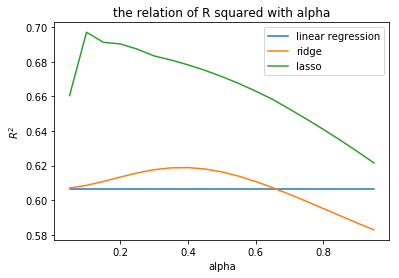

In [173]:
import matplotlib.pyplot as plt
plt.plot(alpha_l,ols_r,label="linear regression")
plt.plot(alpha_l,ridge_r,label="ridge")
plt.plot(alpha_l,lasso_r,label="lasso")
plt.xlabel("alpha")
plt.ylabel("$R^{2}$")
plt.title("the relation of R squared with alpha")
plt.legend()
plt.show()